<a href="https://colab.research.google.com/github/adityasahu88/DL_PROJECTS/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fashion MNIST** is a dataset designed to serve as a drop-in replacement for the classic MNIST dataset (handwritten digits).
- It is often used to benchmark machine learning and deep learning models for image classification tasks.
- Instead of digits, Fashion MNIST consists of grayscale images of fashion items from 10 categories, making it a more challenging and diverse dataset for model evaluation.

**Details of the Fashion MNIST Dataset:**
Number of Classes: 10
**Classes:**
- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot


**Number of Images:**
- Training set: 60,000 images
- Test set: 10,000 images
- Image Size: 28x28 pixels
- Color: Grayscale (1 channel)

**File Format:** NumPy arrays or TensorFlow datasets

**Source:** Fashion items were taken from Zalando, an e-commerce platform.

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Load the data set
fashion_mnist =tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


labels :9


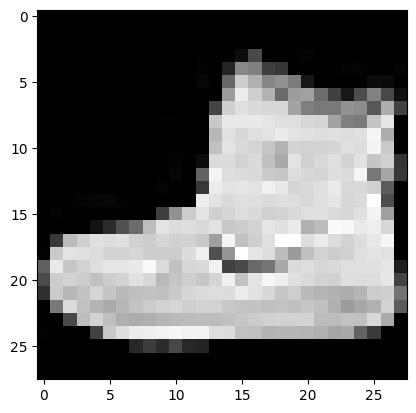

In [4]:
# Check the images
X_train[0]
plt.imshow(X_train[0],cmap ='gray')
print(f"labels :{y_train[0]}")
plt.show()


In [5]:
# Shape of Datasets
X_train.shape
# This represents 60k images 28 width with 28 images

(60000, 28, 28)

In [6]:
# Shape of y_train
y_train.shape  # Represents 60k labels

(60000,)

In [7]:
# shape of X_test
X_test.shape
# This represents 10k images 28 width with 28 images

(10000, 28, 28)

In [8]:
# shape of y_test
y_test.shape
# Represents 10k labels

(10000,)

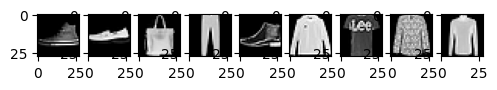

In [9]:
# Display 10 random images

random_list=[]
for i in range(1,10):
  random_list.append(np.random.randint(1,60000))
for e,i in enumerate(random_list):
    plt.subplot(1,10,e+1)
    plt.imshow(X_train[i],cmap="gray")



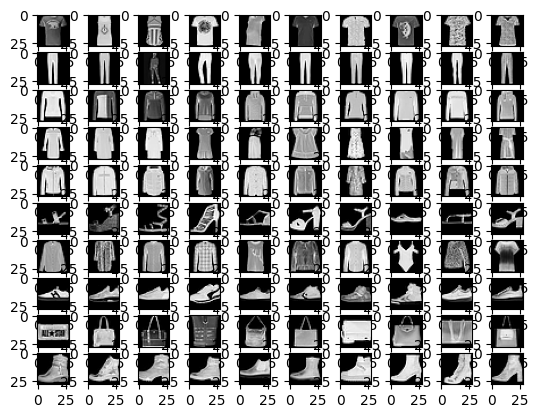

In [10]:
# Display same image each row
for k in range(0,10):
  random_test=(np.random.choice(np.where(y_train == k)[0], 10))
  for e,i in enumerate(random_test):
     plt.subplot(10,10,k*10+e+1)
     plt.imshow(X_train[i],cmap="gray")




In [11]:
print(f" x max : {X_train.max()}")
print(f" x min : {X_train.min()}")

 x max : 255
 x min : 0


In [12]:
#As x ranges between 0 and 255 ,hence it is required to  make it normalize
X_train=X_train/255.0

In [13]:
# we have to apply one-hot encoding in the output layer
y_train_v2=tf.keras.utils.to_categorical(y_train)

In [14]:
#check the shape of y_train and y_train_v2
print(f"shape of y train  : {y_train.shape}")
print(f"shape of y train v2  : {y_train_v2.shape}")

shape of y train  : (60000,)
shape of y train v2  : (60000, 10)


In [15]:
#create a model using SGD OPTIMIZER
model=tf.keras.models.Sequential()
#Create Input layer
model.add(tf.keras.layers.Input((28,28),name="InputLayer"))
#Create Flatten layer
model.add(tf.keras.layers.Flatten(name="Flatten"))
#Create 1st Hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu,name="HiddenLayer1"))
#Create 2nd Hidden layer
model.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,name="HiddenLayer2"))
#Create 3rd Hidden Layer
model.add(tf.keras.layers.Dense(32,activation=tf.keras.activations.relu,name="HiddenLayer3"))
#Create Output layer
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax,name="Output"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer3 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

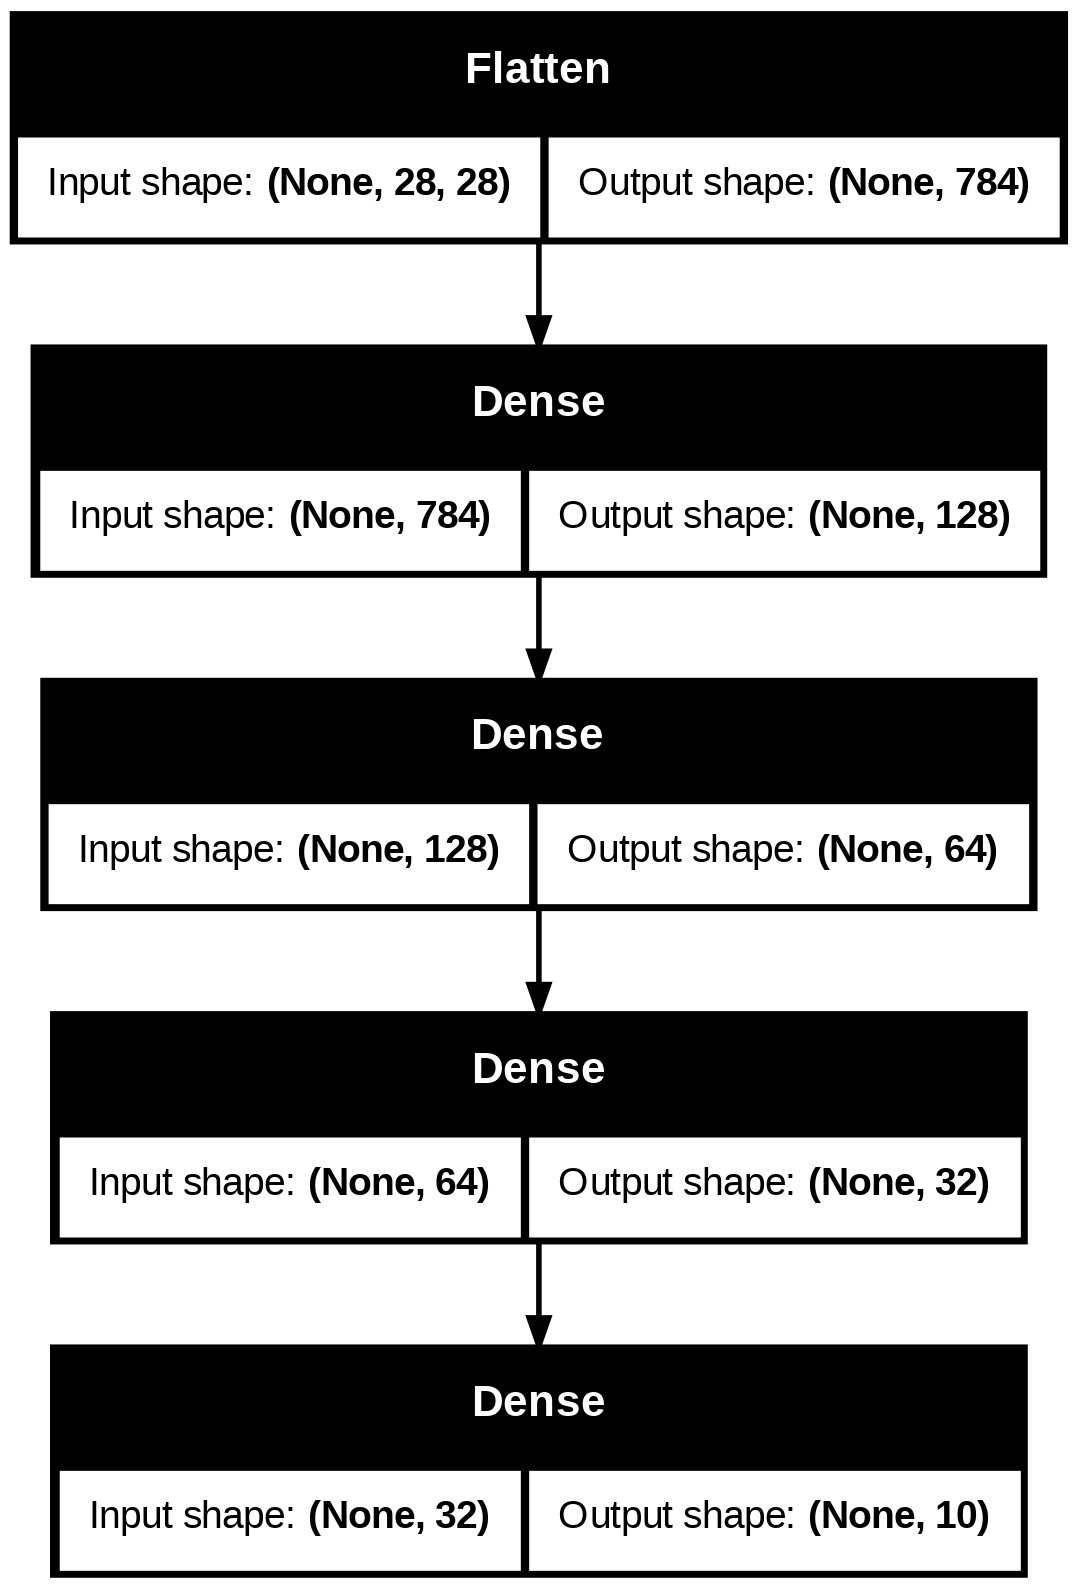

In [16]:
#To plot the Model

tf.keras.utils.plot_model(model,show_shapes=True)

In [17]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics = ["acc"])

In [18]:
model.fit(x=X_train,y=y_train_v2,validation_split = 0.1,batch_size=64,epochs=10)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5314 - loss: 1.4184 - val_acc: 0.7618 - val_loss: 0.6477
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7957 - loss: 0.5891 - val_acc: 0.8133 - val_loss: 0.5275
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8181 - loss: 0.5255 - val_acc: 0.8278 - val_loss: 0.4811
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8316 - loss: 0.4836 - val_acc: 0.8357 - val_loss: 0.4666
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.8378 - loss: 0.4580 - val_acc: 0.8420 - val_loss: 0.4467
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8478 - loss: 0.4322 - val_acc: 0.8448 - val_loss: 0.4353
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8547 - loss: 0.4205 - val_acc: 0.8500 - val_loss: 0.4246
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8535 - loss: 0.4154 - val_acc: 0.8538 - val_loss: 0.4181
Epoch 9/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

In [19]:
score=pd.DataFrame()
score["loss"]     = model.history.history["loss"]
score["val_loss"]     = model.history.history["val_loss"]
score["acc"]     = model.history.history["acc"]
score["val_acc"]     = model.history.history["val_acc"]
score

,loss,val_loss,acc,val_acc
0,0.989304,0.647700,0.668796,0.761833
1,0.573594,0.527541,0.800593,0.813333
2,0.511546,0.481057,0.822259,0.827833
3,0.477977,0.466621,0.833667,0.835667
4,0.454511,0.446693,0.840500,0.842000
5,0.434440,0.435281,0.847370,0.844833
6,0.420796,0.424589,0.852963,0.850000
7,0.409883,0.418074,0.855148,0.853833
8,0.398115,0.428226,0.858852,0.856000
9,0.386982,0.394182,0.863037,0.859500


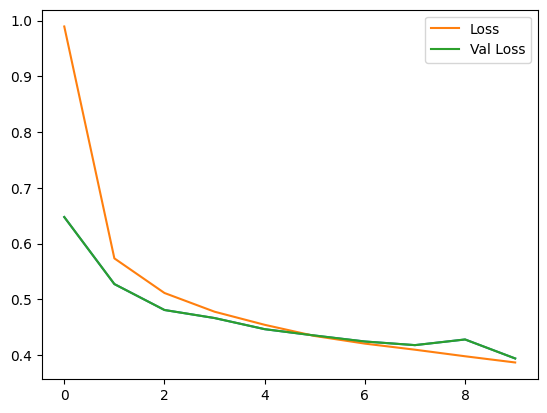

In [20]:
plt.plot(score["val_loss"])
plt.plot(score["loss"], label="Loss")
plt.plot(score["val_loss"], label="Val Loss")
plt.legend()

In [21]:
# MODEL INPUT SHAPE
model.input_shape

(None, 28, 28)

In [22]:
# convert the image into normalize form before sending to model
test_image = X_test[0]
test_image = test_image/255.0
test_image =np.expand_dims(test_image,axis =0)


In [23]:
# pass the test image to model for predict the image
np.argmax(model.predict(test_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


9

Correct Label 9


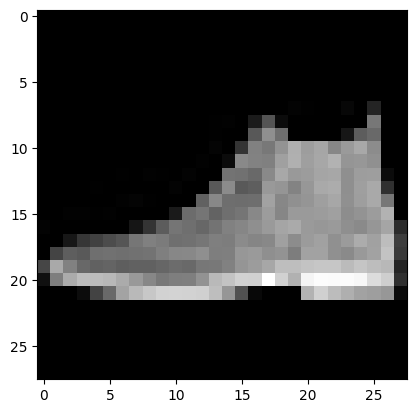

In [25]:
# lets check whether the model predict the correct the image
plt.imshow(X_test[0],cmap ='gray')
print(f"Correct Label {y_test[0]}")

In [29]:
# check the accuracy
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
test_image_v2 = X_test/255.0
y_pred = np.argmax(model.predict(test_image_v2),axis=1)
print(f"The test accuracy : {accuracy_score(y_test,y_pred)}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The test accuracy : 0.8504


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.74      0.79      0.76      1000
           3       0.85      0.86      0.86      1000
           4       0.76      0.73      0.75      1000
           5       0.93      0.94      0.94      1000
           6       0.62      0.65      0.63      1000
           7       0.91      0.93      0.92      1000
           8       0.94      0.96      0.95      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

